# CHI-SQUARE TEST FOR INDEPENDENCE

# 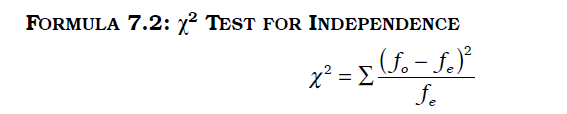

In [4]:
sanction = [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]
offense = [3,3,1,3,2,3,3,1,3,3,1,2,1,1,1,2,3,1,2,1]

## Is there any relationship between sanction and offense?

Null Hypothesis: Sanction and offense are independent of each other.

Alternative Hypothesis: Sanction and offense are not independent of each other

## Observed Frequency  

In [16]:
import numpy as np
data = np.array([sanction, offense]).T
obs_freq = []

for s in set(sanction):
    count_o = []
    for o in set(offense):
        count_o.append(sum((data[:,0]==s)*(data[:,1]==o)))
    obs_freq.append(count_o)
obs_freq = np.array(obs_freq)   
print("Observed Sanction by offense: ", obs_freq )

Observed Sanction by offense:  [[2 1 7]
 [6 3 1]]


## Expected Frequency  

In [19]:
sanction_marginal = obs_freq.sum(axis = 1).reshape(-1,1)
offense_marginal = obs_freq.sum(axis = 0).reshape(1,-1)

exp_freq = sanction_marginal.dot(offense_marginal)/ obs_freq.sum()
print("Expected Sanction by offense: ", exp_freq )

Expected Sanction by offense:  [[4. 2. 4.]
 [4. 2. 4.]]


## Chi-Squared Test

In [23]:
chi_squared_test = (np.power(obs_freq-exp_freq,2)/exp_freq).sum()
print("Chi-squared test: ", chi_squared_test)

Chi-squared test:  7.5


## P-value  

In [29]:
from scipy.stats import chi2
dof = (len(set(sanction))-1)*(len(set(offense))-1)
print("p-value: ", 1 - chi2.cdf(chi_squared_test,dof))

p-value:  0.023517745856009076


## Making decision 

Since the calculated p-value is less than the significance level of 0.05, therefore, we can reject the null hypothesis and conclude that sanction and offense are not independent of each other